In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pickle

In [ ]:
with open("/content/valid.p", mode = 'rb') as validation_data:
    valid = pickle.load(validation_data)

In [ ]:
with open("/content/test.p", mode = 'rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
with open("/content/train.p", mode = 'rb') as training_data:
    train = pickle.load(training_data)

In [ ]:
X_train, y_train = train['features'], train['labels']

In [ ]:
X_validation, y_validation = valid['features'], valid['labels']

In [ ]:
X_test, y_test = test['features'], test['labels']

In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape

(34799,)

In [ ]:
X_validation.shape

(4410, 32, 32, 3)

In [ ]:
X_test.shape

(12630, 32, 32, 3)

In [ ]:
y_test.shape

(12630,)

In [ ]:
from sklearn.utils import shuffle

In [ ]:
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)

In [ ]:
X_train_gray.shape

(34799, 32, 32, 1)

In [ ]:
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)
X_validation_gray.shape

(4410, 32, 32, 1)

In [ ]:
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_test_gray.shape

(12630, 32, 32, 1)

In [ ]:
X_train_gray_norm = (X_train_gray - 128) / 128

In [ ]:
i = 23

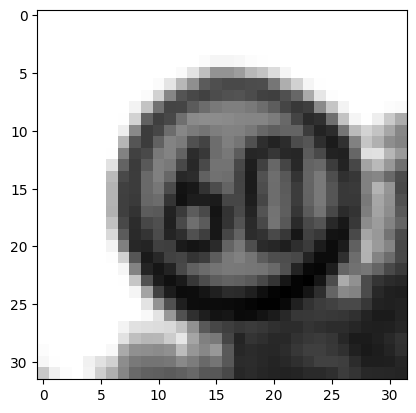

In [ ]:
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')
# X_train_gray_norm

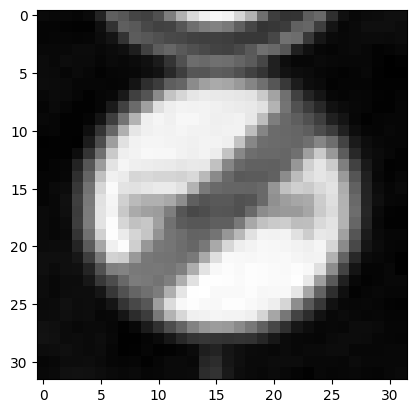

In [ ]:
X_validation_gray_norm = (X_validation_gray - 128) / 128
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

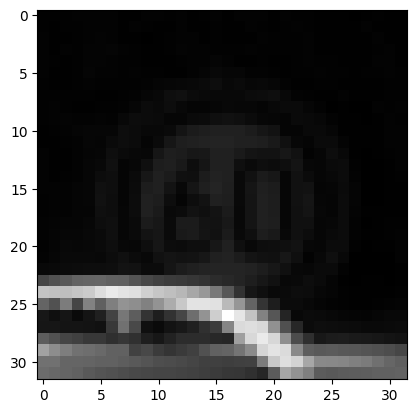

In [ ]:
X_test_gray_norm = (X_test_gray - 128) / 128
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 6, kernel_size = (5, 5), activation = 'relu', input_shape = (32, 32, 1)))
cnn_model.add(AveragePooling2D())
cnn_model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
cnn_model.add(AveragePooling2D())
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 120, activation = 'relu'))
cnn_model.add(Dense(units = 84, activation = 'relu'))
cnn_model.add(Dense(units = 43, activation = 'softmax'))
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
history = cnn_model.fit(X_train_gray_norm,
              y_train,
              batch_size = 500,
              epochs = 45,
              verbose = 1,
              validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/45
70/70 [==============================] - 7s 32ms/step - loss: 3.1782 - accuracy: 0.1634 - val_loss: 2.7117 - val_accuracy: 0.2798
Epoch 2/45
70/70 [==============================] - 2s 22ms/step - loss: 1.7549 - accuracy: 0.5183 - val_loss: 1.5467 - val_accuracy: 0.5506
Epoch 3/45
70/70 [==============================] - 1s 10ms/step - loss: 0.9961 - accuracy: 0.7155 - val_loss: 1.0779 - val_accuracy: 0.6685
Epoch 4/45
70/70 [==============================] - 1s 9ms/step - loss: 0.7054 - accuracy: 0.8013 - val_loss: 0.8631 - val_accuracy: 0.7234
Epoch 5/45
70/70 [==============================] - 1s 7ms/step - loss: 0.5512 - accuracy: 0.8470 - val_loss: 0.7627 - val_accuracy: 0.7891
Epoch 6/45
70/70 [==============================] - 0s 6ms/step - loss: 0.4585 - accuracy: 0.8757 - val_loss: 0.7122 - val_accuracy: 0.7862
Epoch 7/45
70/70 [==============================] - 0s 6ms/step - loss: 0.3921 - accuracy: 0.8958 - val_loss: 0.6513 - val_accuracy: 0.8245
Epoch 8/45
70/70 

In [ ]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 1s 3ms/step - loss: 1.2906 - accuracy: 0.8496


In [ ]:
print("Acurácia: {}%".format(round(score[1] * 100, 2)))

Acurácia: 84.96%


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']

In [ ]:
loss = history.history['loss']
valid_loss = history.history['val_loss']
valid_accuracy = history.history['val_accuracy']

In [ ]:
epochs = range(1, len(accuracy) + 1)
print(epochs)

range(1, 46)


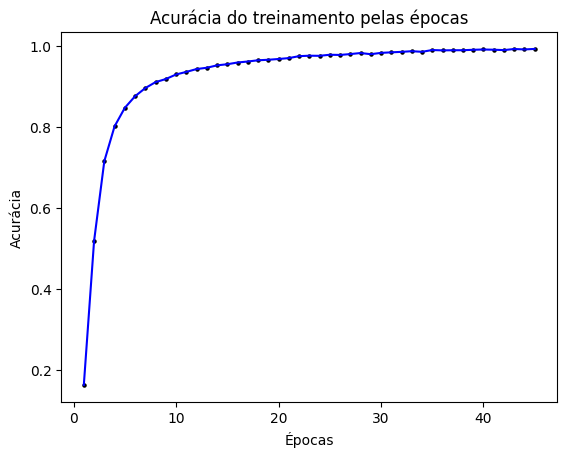

In [ ]:
plt.scatter(epochs, accuracy, color = 'black', sizes = [5])
plt.plot(epochs, accuracy, 'blue')
plt.title('Acurácia do treinamento pelas épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

plt.show()

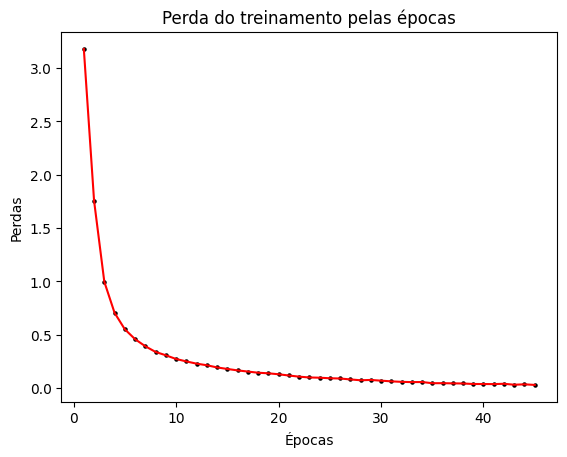

In [ ]:
plt.scatter(epochs, loss, color = 'black', sizes = [5])
plt.plot(epochs, loss, color = 'red')
plt.title('Perda do treinamento pelas épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')

plt.show()

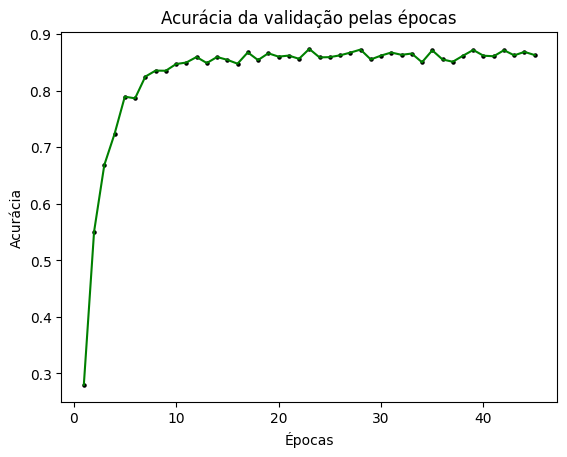

In [ ]:
plt.scatter(epochs, valid_accuracy, color = 'black', sizes = [5])
plt.plot(epochs, valid_accuracy, color = 'green')
plt.title('Acurácia da validação pelas épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

plt.show()

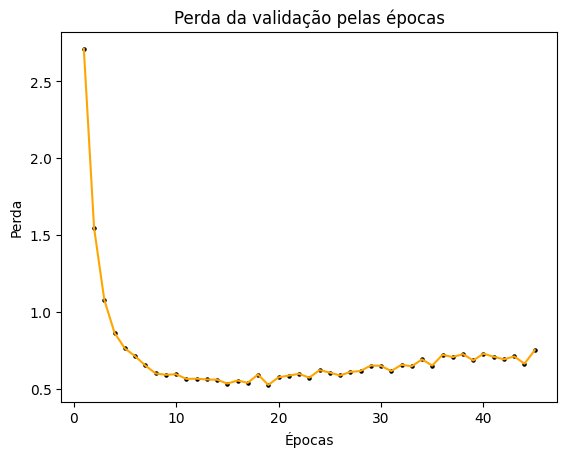

In [ ]:
plt.scatter(epochs, valid_loss, color = 'black', sizes = [5])
plt.plot(epochs, valid_loss, color = 'orange')
plt.title('Perda da validação pelas épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')

plt.show()

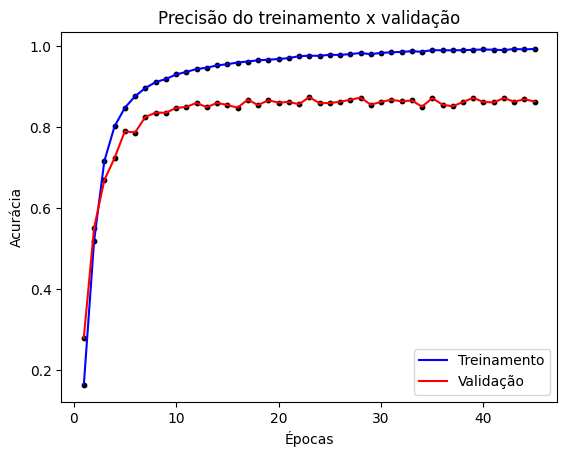

In [ ]:
plt.plot(epochs, accuracy, color = 'blue')
plt.plot(epochs, valid_accuracy, color = 'red')

plt.scatter(epochs, accuracy, color = 'black', sizes = [10])
plt.scatter(epochs, valid_accuracy, color = 'black', sizes = [10])


plt.title('Precisão do treinamento x validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

plt.legend(['Treinamento', 'Validação'])

plt.show()

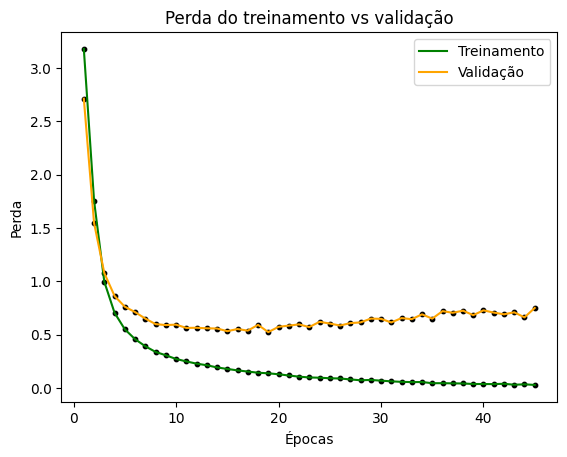

In [ ]:
plt.plot(epochs, loss, color = 'green')
plt.plot(epochs, valid_loss, color = 'orange')

plt.scatter(epochs, loss, color = 'black', sizes = [10])
plt.scatter(epochs, valid_loss, color = 'black', sizes = [10])

plt.title('Perda do treinamento vs validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')

plt.legend(['Treinamento', 'Validação'])

plt.show()

### Matriz confusão





In [ ]:
predicted_x = cnn_model.predict(X_test_gray_norm)
classes_x = np.argmax(predicted_x, axis = 1)

395/395 [==============================] - 1s 2ms/step


In [ ]:
y_true = y_test

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_true, classes_x)

<Axes: >

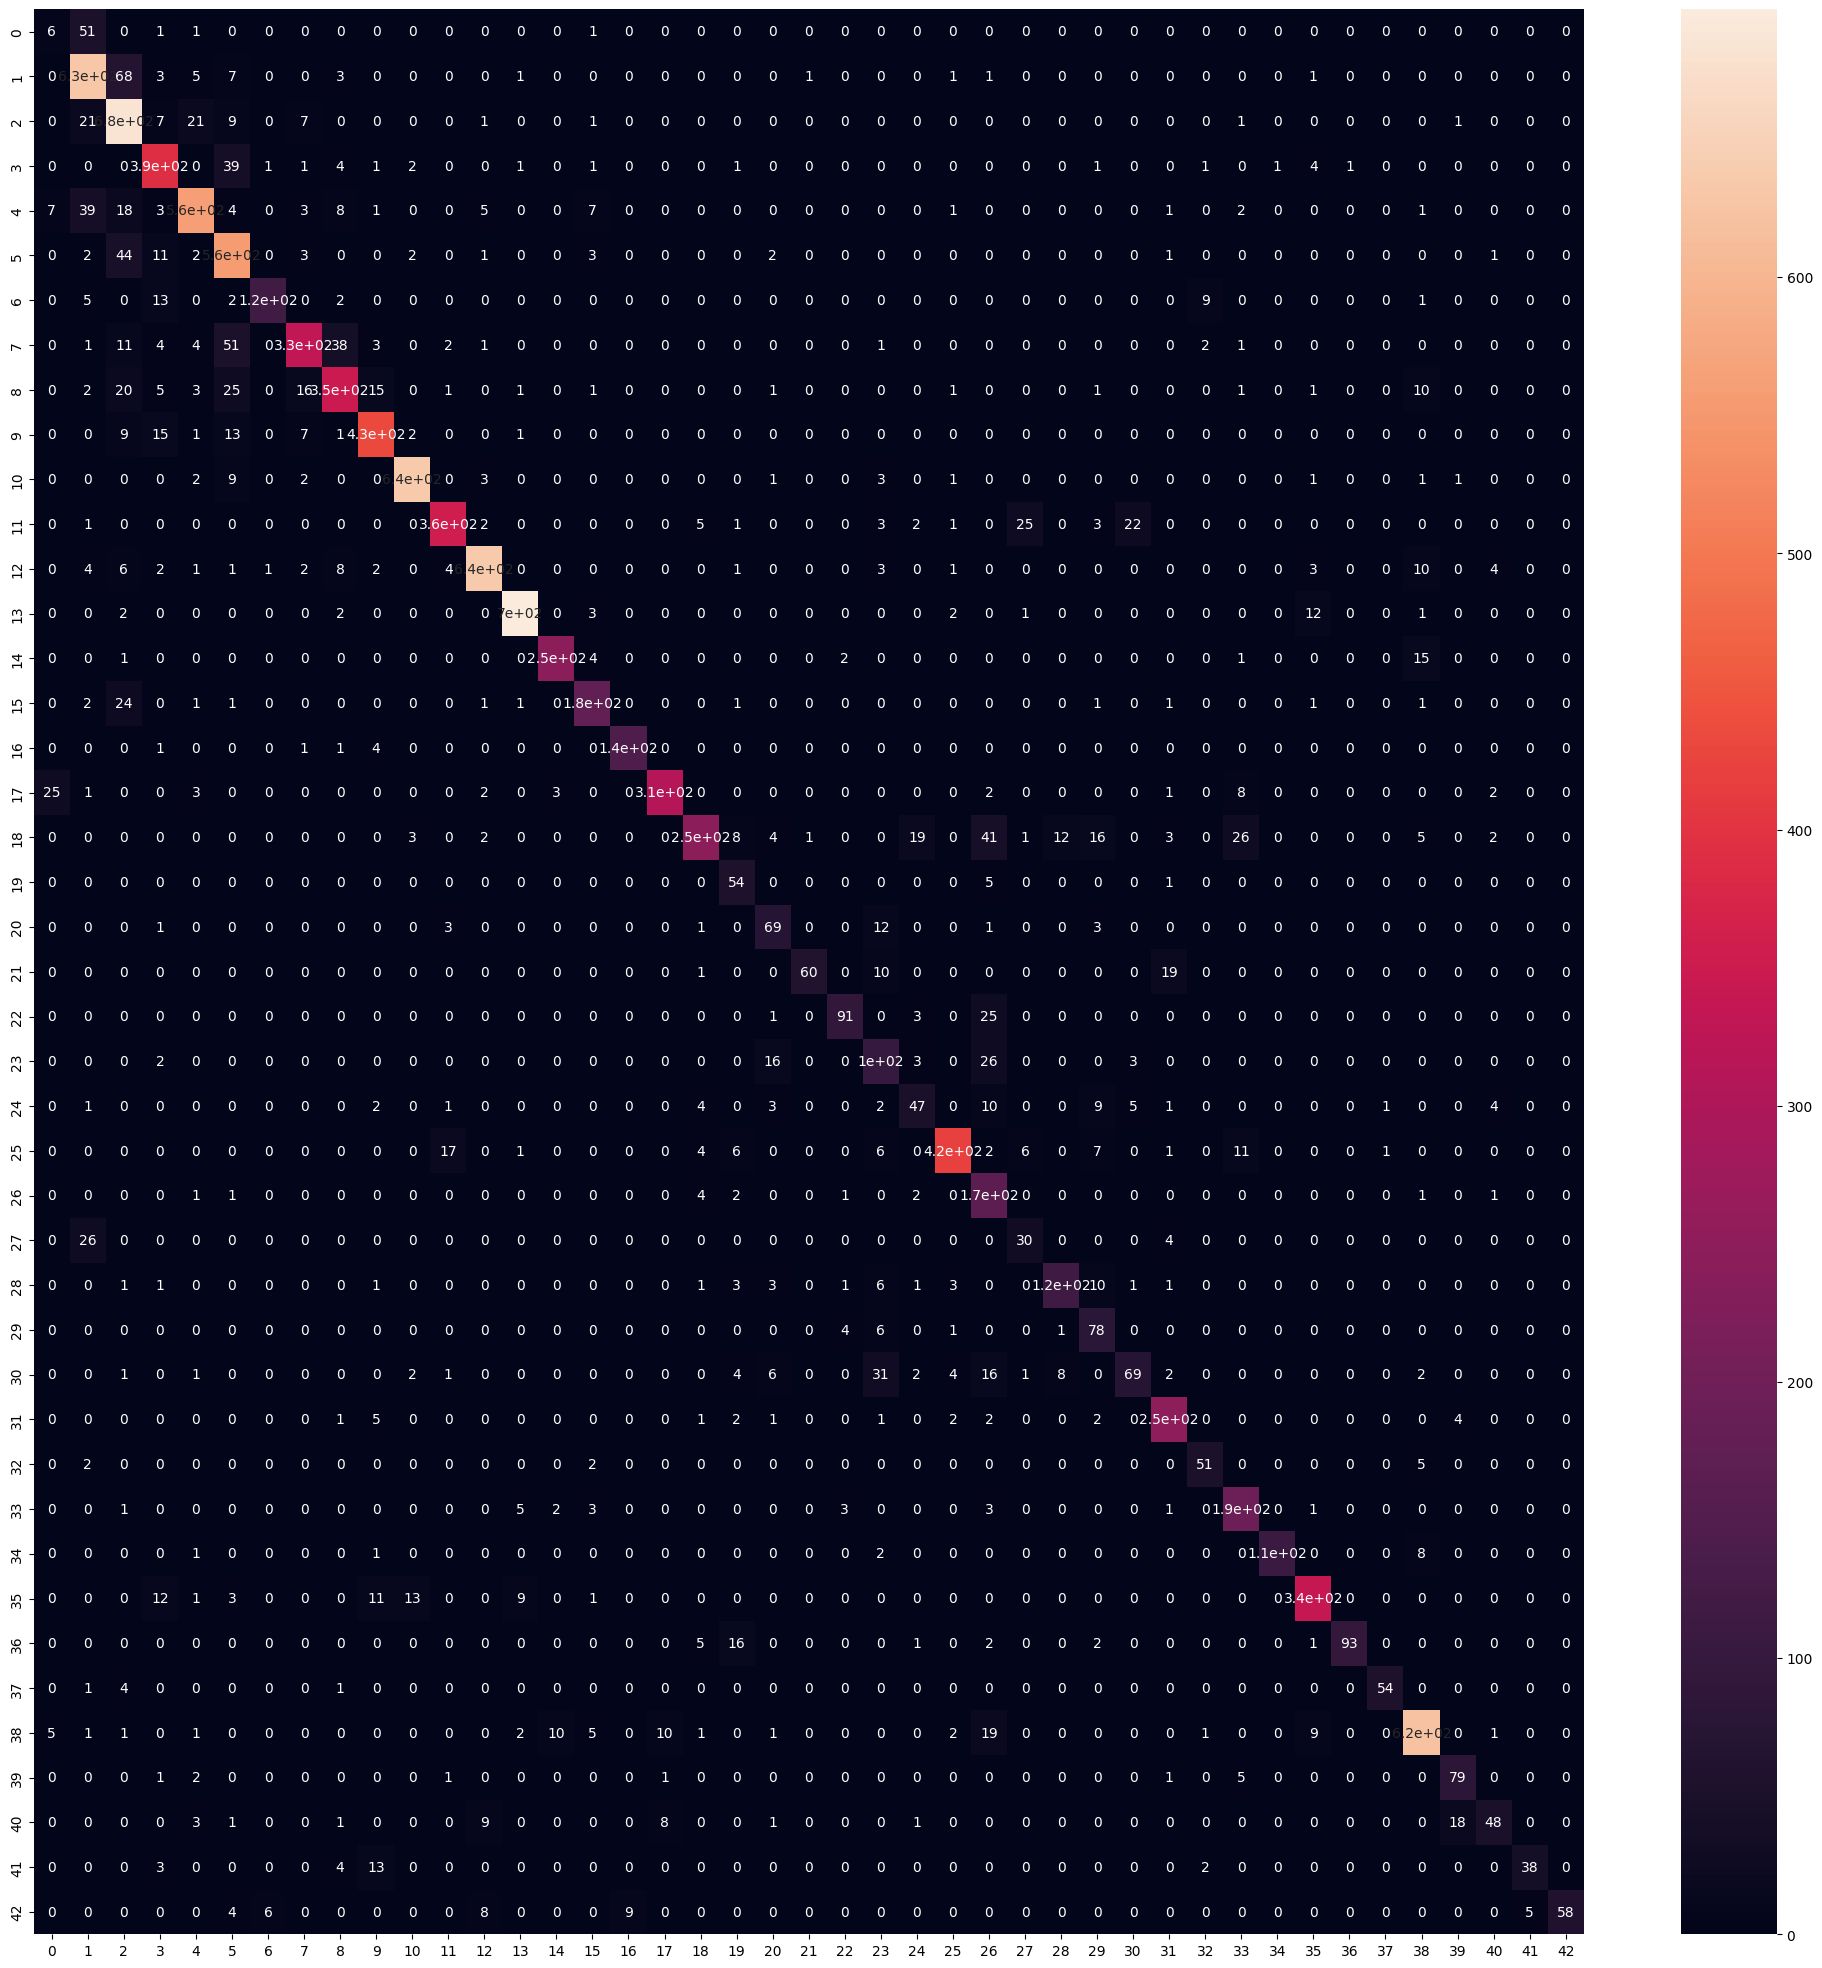

In [ ]:
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [ ]:
length = 5
width = 5

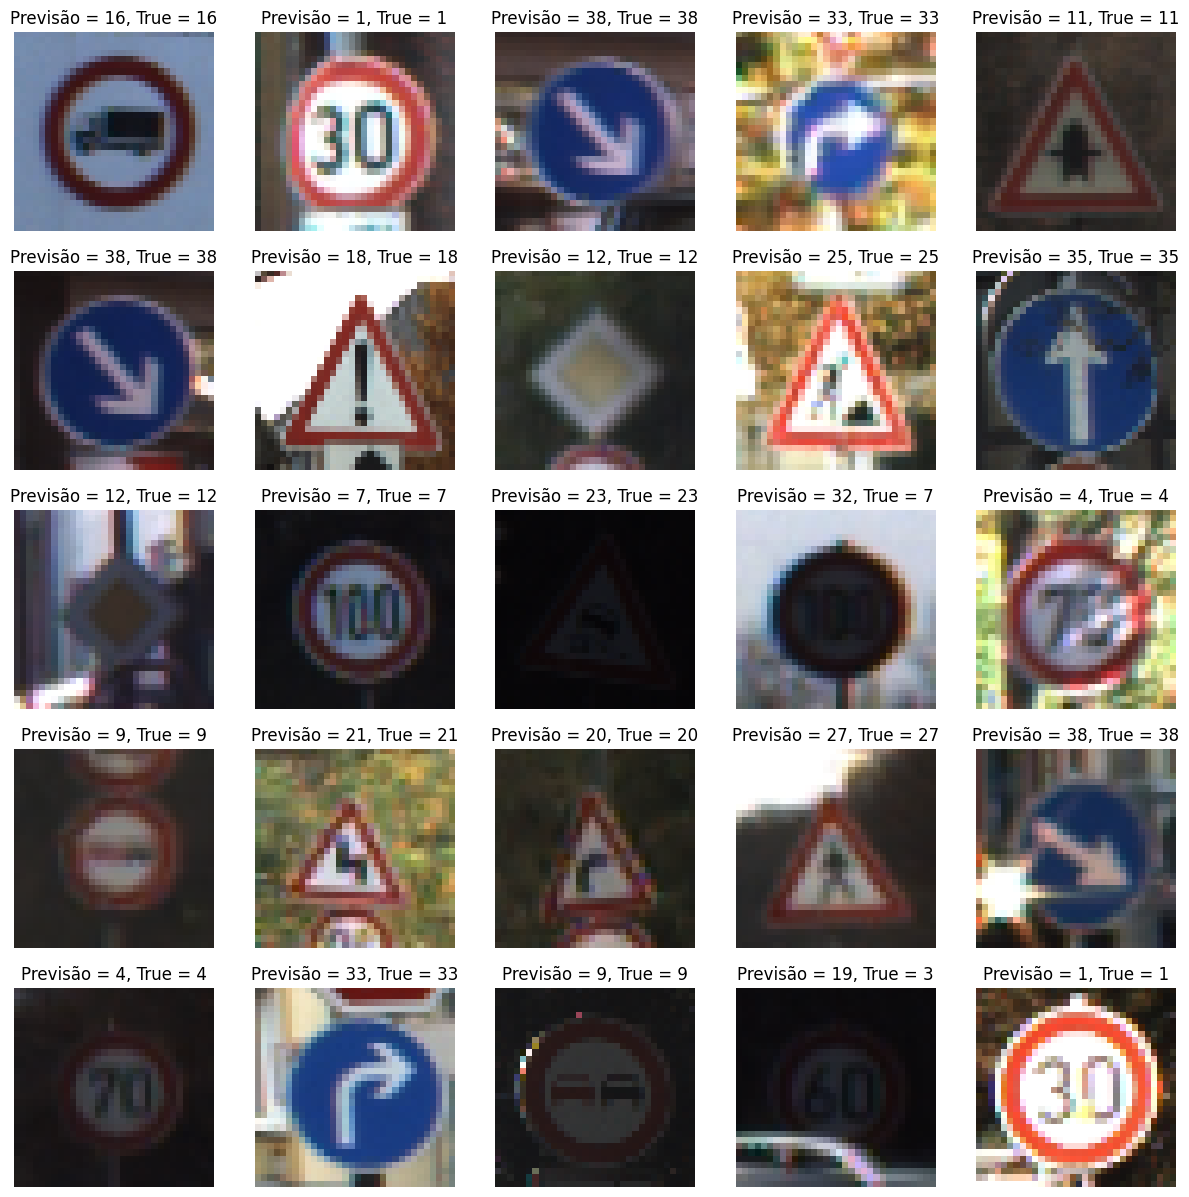

In [ ]:
fig, axes = plt.subplots(length, width, figsize = (15, 15))
axes = axes.ravel()

for i in np.arange(0, length * width):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Previsão = {}, True = {}'.format(classes_x[i], y_true[i]))
    axes[i].axis('off')